# Live Laugh Love Presentation
Our group tackled the question of which neighborhood in Pittsburgh is best by analyzing data from the perspective of a prospective retiree. The metric we chose to evaluate this is livability.

## Defining Livability
Our group defined livability as conditions which contribute to an increased qualitify of life for the residents of a neighhborhood. This metric seems broad, but we found it to be relatively straightforward to understand which submetrics would contribute to livability. Specifically, the submetrics our gorup analyzed were population density, crime rate, and land usage, three factors that we thought contributed singificantly to livability and would be of concern to a retiree.

## Part 1: Population Density
Population density is essentially the ratio between the number of people living in a region and the amount of land within that region. It outlines the number of people expected to be living in a certain land area.

### Population Density and Livability
Intitially, population density might seem like a strane metric for measuring livability, but the connection is actually quite simple. A lower population density implies than an individual is able to take up more space in the environment, implying more comfortable living, contributing to a greater livability. To simplify, lower population density makes a space more livable for its residents.

### Data Used
In order analyze this metric, I used population density data from the 2010 SNAP Census of Pittsburgh. While this data is somewhat outdated and the individual datapoints are sure to have changed since, it should still project relatively well in terms of the general placement of each neighborhood.

### Analysis Overview
Here is the initial dataset used.

In [1]:
import pandas as pd # we're obviously gonna need pandas for this stuff
import matplotlib.pyplot as plt
import geopandas

data = pd.read_excel('population-density.xls') # importing data from Excel file
data.head(5)

,Neighborhood,Sector #,Pop. 1940,Pop. 1950,Pop. 1960,Pop. 1970,Pop. 1980,Pop. 1990,Pop. 2000,Pop. 2010,...,% Other (2010),% White (2010),% 2+ Races (2010),% Hispanic (of any race) (2010),% Pop. Age < 5 (2010),% Pop. Age 5-19 (2010),% Pop. Age 20-34 (2010),% Pop. Age 35-59 (2010),% Pop. Age 60-74 (2010),% Pop. Age > 75 (2010)
0,Allegheny Center,3,4521,3862,2512,632,1586,1262,886,933,...,0.006431,0.408360,0.0397,0.029,0.0419,0.2170,0.2757,0.2243,0.1761,0.0650
1,Allegheny West,3,3210,3313,2170,1124,820,654,508,462,...,0.006494,0.766234,0.0303,0.028,0.0000,0.0000,0.0837,0.6820,0.1255,0.1088
2,Allentown,6,8227,7487,6416,5361,4292,3600,3220,2500,...,0.008000,0.594000,0.0464,0.023,0.0366,0.1485,0.2411,0.3530,0.1440,0.0767
3,Arlington,7,2702,3203,4430,3949,2294,2210,1999,1869,...,0.003745,0.764580,0.0316,0.014,0.0691,0.1889,0.1945,0.3153,0.0888,0.1433
4,Arlington Heights,7,2413,2860,2272,2037,1466,1497,238,244,...,0.016393,0.094262,0.0492,0.008,0.0410,0.3925,0.1638,0.3072,0.0341,0.0614


While informative, this dataset has far too many irrelevant datapoints and is presented in an unhelpful manner. After filtering out the unnecessary datapoints and ordering out the neighborhoods, here is what we are left with. 

In [3]:
popDenData = data[["Neighborhood", # filtering out columns
                   "Pop. 2010",
                   "Land Area (sq. mi)",
                   "Persons / sq. mi (2010)"]] 
popDenData.sort_values(by = ["Persons / sq. mi (2010)"], # listing in ascending order
                       inplace = True, ascending = True)
popDenData.head(10)

/tmp/ipykernel_12095/574423063.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popDenData.sort_values(by = ["Persons / sq. mi (2010)"], # filter out neighborhood with <100 people in them


,Neighborhood,Pop. 2010,Land Area (sq. mi),Persons / sq. mi (2010)
21,Chateau,11,0.383,28.720627
70,South Shore,19,0.212,89.622642
37,Hays,362,1.750,206.857143
77,St. Clair,209,0.310,674.193548
56,North Shore,303,0.303,1000.000000
79,Strip District,616,0.608,1013.157895
31,Fairywood,1002,0.969,1034.055728
54,New Homestead,990,0.794,1246.851385
86,West End,254,0.200,1270.000000
30,Esplen,301,0.230,1308.695652


Notice that Chateau and South Shore have very few residents. This makes them ultimately irrelevant in our analysis, as livability also implies that housing is readily available. We'll remove them to conclude our data manipulation.

In [4]:
popMask = popDenData['Pop. 2010'] >= 100
finalPopDenData = popDenData[popMask]

finalPopDenData.head(10)

,Neighborhood,Pop. 2010,Land Area (sq. mi),Persons / sq. mi (2010)
37,Hays,362,1.750,206.857143
77,St. Clair,209,0.310,674.193548
56,North Shore,303,0.303,1000.000000
79,Strip District,616,0.608,1013.157895
31,Fairywood,1002,0.969,1034.055728
54,New Homestead,990,0.794,1246.851385
86,West End,254,0.200,1270.000000
30,Esplen,301,0.230,1308.695652
66,Ridgemont,483,0.369,1308.943089
26,East Carnegie,570,0.432,1319.444444


When graphed, our results look like this.

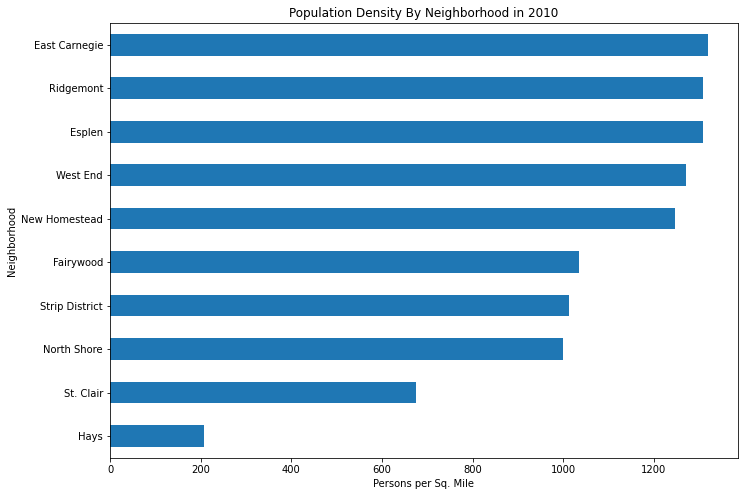

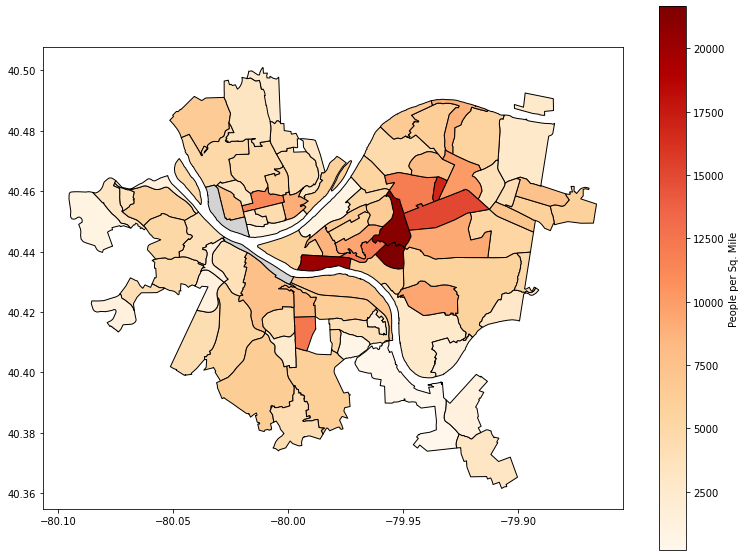

In [5]:
# plot bar graph
ax = finalPopDenData.head(10).plot.barh(x='Neighborhood',
                                   y='Persons / sq. mi (2010)',
                                   rot = 0,
                                   figsize=(11.25, 8),
                                   legend = False,
                                   title='Population Density By Neighborhood in 2010')
ax.set(xlabel="Persons per Sq. Mile", ylabel="Neighborhood")

# plot heat map
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
popDenHeatMap = neighborhoods.merge(finalPopDenData, how='left', left_on='hood', right_on='Neighborhood')
popDenHeatMap.plot(column='Persons / sq. mi (2010)',legend = True,
                cmap = "OrRd",
                edgecolor="black",
                legend_kwds={'label': "People per Sq. Mile"},
                figsize=(13, 10),
                missing_kwds={"color": "lightgrey"}) # set disqualified neighborhoods to gray

### Results
Based on the above results, Hays, St. Clair, and North Shore were the top 3 least dense neighborhoods.

___________________________________________________________________________________________________________

## Part 2: Land Usage

Land Usage is the way in which a certain land is used. This encompasses residential usage, commercial usage, industrial usage, institutional usage, etc. 

### Land Usage and Livability

The way a land is used and the ratios of how much a land is used in certain ways is crucial to determining livability as livibility implies that the way that certain land is used provides for livable spaces. In this sense, land usage almost directly feeds into livability, as land usage is the data, which is shaped by the standards of livability. 

The metric/standards of livability that will help shape the land use data is the following (simplified and ranked by priority most to least):

1. Industrial Use preferrably 0%, but mainly below 5% to account for variation
   - Idustrial areas cause pollution and are not suited for public use
2. Open Space from 30% to 75% (75% open space to account for higher end neighborhoods)
   - Wide range of open space. Generally higher percentage range to provide green spaces that boost public health
3. Residential use up to 25% - 75%
   - Middle ground for not too little people (isolation/rural) and not too many (crowded)
4. Commercial Use up to 75%
   - Economic boost and easy access
   - Lower on priority scale because cars available to most people in Pittsburgh
5. Hillside not more than 25%
   - Too hilly can be a problem for walkability/traveling (steepness and distance)

### Data Used 

In order analyze this metric, I used Land Use data from the 2010 SNAP Census of Pittsburgh. The data is certainly outdated and therefore, the current results are not an accurate reflection of the current best neighborhood.

### Analysis Overview
Here is the initial dataset used.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas

data = pd.read_csv("landuse.csv")

data.head(5)

,Neighborhood,Sector #,Population (2010),Land Area (acres),Residential,Mixed Use / Commercial,Mixed Use / Industrial,Institutional / Edu. / Med.,Open Space,Hillside,Special Land Use
0,Allegheny Center,3,933,134.4,0.0%,49.4%,0.0%,0.0%,50.6%,0.0%,0.0%
1,Allegheny West,3,462,90.2,42.1%,12.5%,6.3%,26.4%,12.6%,0.0%,0.0%
2,Allentown,6,"2,500",188.8,54.6%,9.3%,0.0%,0.0%,18.5%,17.6%,0.0%
3,Arlington,7,"1,869",300.8,43.7%,3.8%,10.9%,0.0%,41.6%,0.0%,0.0%
4,Arlington Heights,7,244,84.5,56.5%,0.0%,0.0%,0.0%,43.4%,0.0%,0.0%


To be able to filter out data, we must first convert the percentages (strings) to floats. 

In [2]:
for index, row in data.iterrows():
    
    ## column values
    
    indnumber_string = row['Mixed Use / Industrial']
    open_string = row['Open Space']
    res_string = row['Residential']
    comm_string = row['Mixed Use / Commercial']
    hill_string = row['Hillside']
    
    ##Industrial
    
    indnumber = indnumber_string.rstrip('%')
    ind_replace = float(indnumber)
    data['Mixed Use / Industrial'].replace([indnumber_string], ind_replace, inplace = True)
    
    ##Open Space
    
    opennumber = open_string.rstrip('%')
    open_replace = float(opennumber)
    data['Open Space'].replace([open_string], open_replace, inplace = True)
    
    ##Residential
    
    resnumber = res_string.rstrip('%')
    res_replace = float(resnumber)
    data['Residential'].replace([res_string], res_replace, inplace = True)
    
    ##Commercial
    
    commnumber = comm_string.rstrip('%')
    comm_replace = float(commnumber)
    data['Mixed Use / Commercial'].replace([comm_string], comm_replace, inplace = True)
    
    ##Hillside
    
    hillnumber = hill_string.rstrip('%')
    hill_replace = float(hillnumber)
    data['Hillside'].replace([hill_string], hill_replace, inplace = True)
    

For simplicity, I have combined all the masks into one coding cell, so that only the final data, after having been filtered is shown below.

In [3]:
##Industrial Mask 
#Industrial below 5.0%

indMask = data['Mixed Use / Industrial'] <= 5.0
ind_Data = data[indMask]

##Open Space Mask 
# 30.0% <= Open Space <= 75.0%

firstopenMask = ind_Data['Open Space'] >= 30.0
open_filteredData = ind_Data[firstopenMask]

openMask = open_filteredData['Open Space'] <= 75.0
open_Data = open_filteredData[openMask]

##Residential Mask 
# 25.0% <= Residential <= 75.0%

firstresMask = open_Data['Residential'] >= 25.0
res_filteredData = open_Data[firstresMask]

resMask = res_filteredData['Residential'] <= 75.0
res_Data = res_filteredData[resMask]

##Final Data Mask

finalData = res_Data[['Neighborhood','Mixed Use / Commercial']].copy() ## Create new dataframe for only viewing Neighborhood and Commercial Use
finalData.head(20)

,Neighborhood,Mixed Use / Commercial
4,Arlington Heights,0.0
6,Bedford Dwellings,0.0
24,Duquesne Heights,1.4
39,Highland Park,0.9
46,Lincoln-Lemington-Belmar,6.4
54,New Homestead,0.0
57,Northview Heights,1.0
60,Perry North,1.0
62,Point Breeze,0.8
65,Regent Square,0.4


Because there are only 13 neighborhoods remaining, we may have to alter our terms regarding commercial use and hillside. Because they were lower on the preference scale, they can be modified to fit the remaining data. The preference is that we choose a place with the highest commercial use possible. Hillside should preferrably be lower than 25.0%, which already seems the case with basic observation of the remaining data.

Let's create a bar graph to see how much commercial use each of the remaining neighborhoods has. First let's create a new data set for organizational purposes.

[Text(0, 0.5, 'Commercial Use Percentage'), Text(0.5, 0, 'Neighborhooda')]

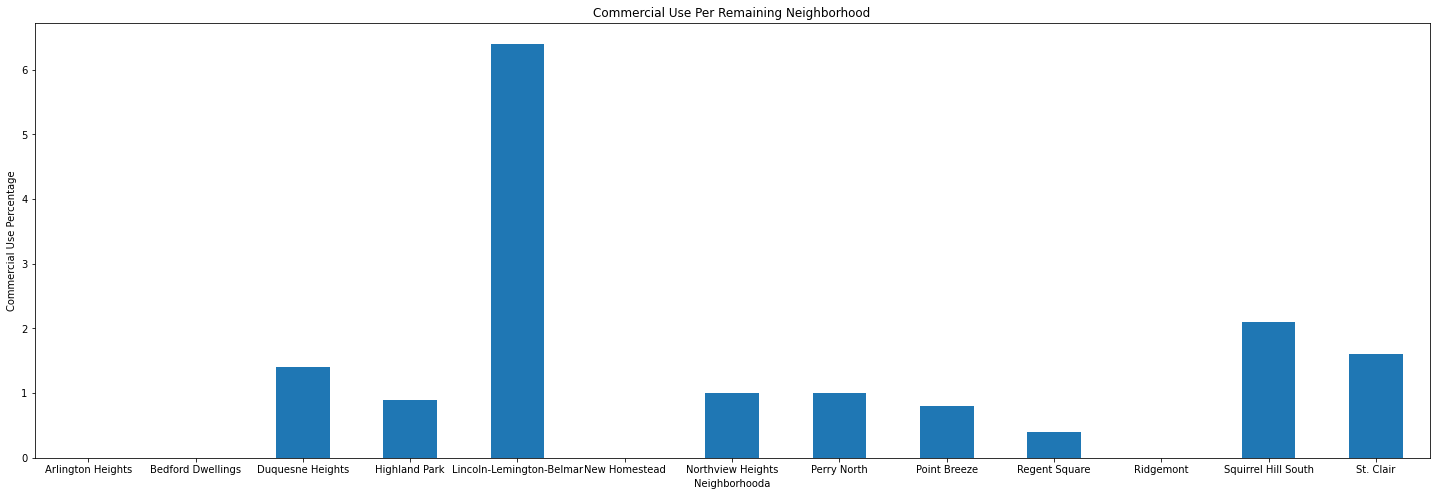

In [9]:
# Bar Graph
viewing = finalData.head(20).plot.bar(x='Neighborhood',
                                   y='Mixed Use / Commercial',
                                   rot = 0,
                                   figsize=(25, 8),
                                   legend = False,
                                   title='Commercial Use Per Remaining Neighborhood')
viewing.set(xlabel="Neighborhooda", ylabel="Commercial Use Percentage")

As we can see, Lincoln-Lemington-Belmar triumphs in the final criteria for the best neighborhood by holding the highest commercial use percentage out of the remaining neighborhoods. Squirrel Hill South comes second and St. Clair comes in third.

Now to display the remaining neighborhoods by location of prefrences based on the last criteria of commercial use.

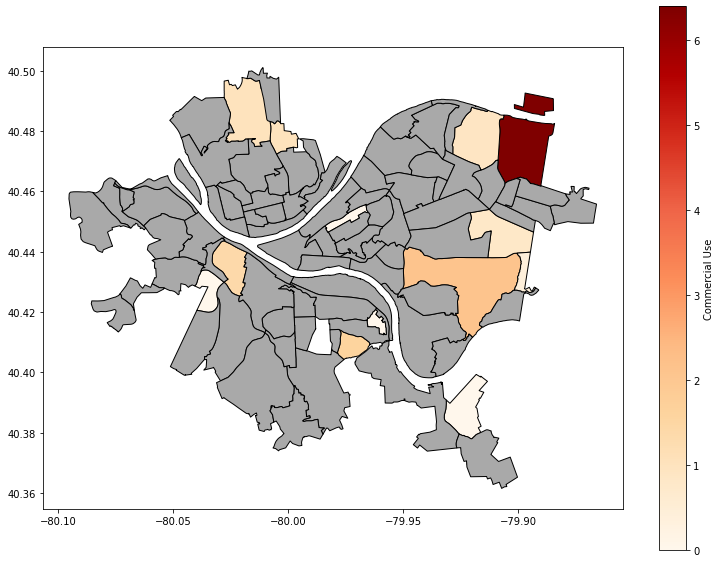

In [10]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
finalMap = neighborhoods.merge(finalData, how='left', left_on='hood', right_on='Neighborhood')
finalMap.plot(column='Mixed Use / Commercial',legend = True,
                cmap = "OrRd",
                edgecolor="black",
                legend_kwds={'label': "Commercial Use"},
                figsize=(13, 10),
                missing_kwds={"color": "darkgrey"}) 

### Results

Lincoln-Lemington-Belmar is the best neighborhood in pittsburgh based on my criteria and code. Squirrel Hill South comes second and St. Clair comes third. 

___________________________________________________________________________________________________________

## Part 3: Land Usage